In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.interactive(False)
%matplotlib inline
import random
random.seed(42)

In [70]:
#https://www.kaggle.com/wenruliu/adult-income-dataset
df = pd.read_csv('adult.csv')
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4058,23,?,213004,Some-college,10,Never-married,?,Own-child,White,Female,0,1719,30,United-States,<=50K
28957,23,Private,169104,Some-college,10,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,25,United-States,<=50K
46127,30,Local-gov,118500,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42977,56,Private,174040,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
25548,35,Private,115803,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Remove fair features

In [71]:
target = np.where(df['income'] == '<=50K', 0, 1)
df = df[['age', 'race', 'gender']]


In [72]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# normalized 
df = pd.get_dummies(df, columns=['race', 'gender'] ,prefix='f')
df

,age,f_Amer-Indian-Eskimo,f_Asian-Pac-Islander,f_Black,f_Other,f_White,f_Female,f_Male
0,25,0,0,1,0,0,0,1
1,38,0,0,0,0,1,0,1
2,28,0,0,0,0,1,0,1
3,44,0,0,1,0,0,0,1
4,18,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,1,1,0
48838,40,0,0,0,0,1,0,1
48839,58,0,0,0,0,1,1,0
48840,22,0,0,0,0,1,0,1


In [75]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)


In [76]:
X_train

,age,f_Amer-Indian-Eskimo,f_Asian-Pac-Islander,f_Black,f_Other,f_White,f_Female,f_Male
37193,42,0,0,0,0,1,0,1
31093,52,0,0,0,0,1,0,1
33814,34,0,0,0,0,1,0,1
14500,28,0,0,0,0,1,1,0
23399,46,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
11284,36,0,0,1,0,0,0,1
44732,34,0,0,0,0,1,0,1
38158,28,0,0,0,0,1,1,0
860,46,0,0,1,0,0,1,0


# LR

In [77]:
%%time
classifier = LogisticRegression(max_iter=1000, n_jobs=1) #class_weight='balanced',
model = classifier.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      7479
           1       0.28      0.05      0.09      2290

    accuracy                           0.75      9769
   macro avg       0.53      0.51      0.47      9769
weighted avg       0.65      0.75      0.67      9769

Wall time: 144 ms


# DT

In [92]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=8, class_weight='balanced', min_samples_leaf=3, min_samples_split=3)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=3,
                       min_samples_split=3)

True

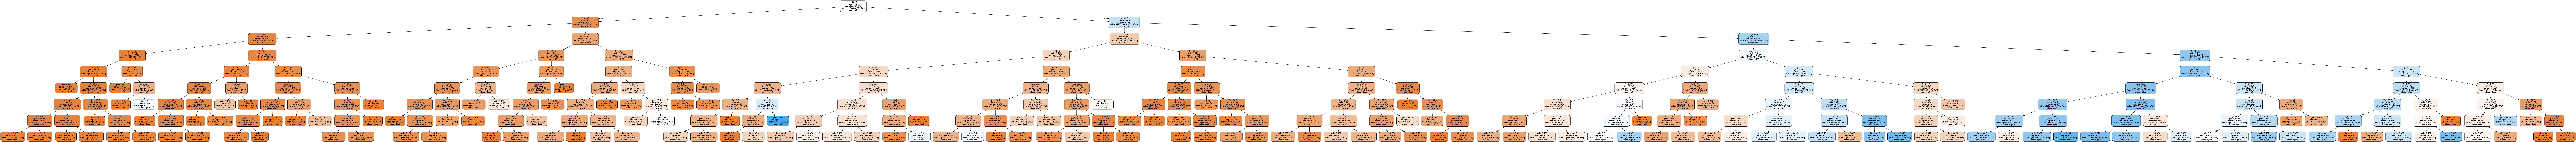

In [93]:


dot_data = tree.export_graphviz(tree_classifier, out_file=None, class_names=['le50','gt50'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_jpeg('dummy.jpeg')
Image(filename='dummy.jpeg', width=1500, height=1500)


In [94]:
prediction = tree_classifier.predict(X_test)
print(classification_report(y_test, prediction))

confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.91      0.63      0.74      7479
           1       0.40      0.79      0.53      2290

    accuracy                           0.67      9769
   macro avg       0.65      0.71      0.64      9769
weighted avg       0.79      0.67      0.69      9769



array([[4722, 2757],
       [ 482, 1808]], dtype=int64)